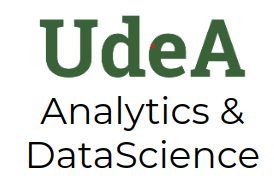

# Técnicas de clasificación para optimización de procesos de cargue de productos químicos

La operación de cargue de productos químicos, es un proceso con un alto componente de incertidumbre debido a la gran cantidad de elementos involucrados, y la posibilidad de que alguno de estos falle, así como la complejidad del proceso, que podría desencadenar un retraso logístico considerable en la operación. Dada la posibilidad de entender y describir adecuadamente el proceso a partir de la analítica, pueden brindarse herramientas valiosas a la compañía, con el propósito de tomar medidas correctivas a partir de un análisis mas profundo que el realizado actualmente con el uso de herramientas informáticas tradicionales.

## 1. Librerias y configuraciones previas

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Preparación de datos
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler

# Evaluación de modelos
# ==============================================================================
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ParameterGrid

import statsmodels.api as sm

from sklearn.svm import LinearSVC

from sklearn import svm

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
     
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1: 
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [3]:
# Funcion para imprimir la curva ROC

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## 3. Carga del dataset

El data set corresponde a los tiempos de cargue de una Multinacional Colombiana, dedicada a la producción de cloruro de sodio y sus derivados químicos, por lo que la versión completa de la misma es de carácter confidencial y no se provee como anexo a este documento.

Para el segundo entregable de la materia "Seminario" del postgrado en analítica y ciencia de Datos, solo se usarán los datos correspondientes al año 2022 y el año 2023 hasta el 03 de marzo. Para las próximas iteraciones se realizará la limpieza y preparación de datos de 2020 y 2021, los cuales se encuentran en un formato diferente a los mencionados anteriormente

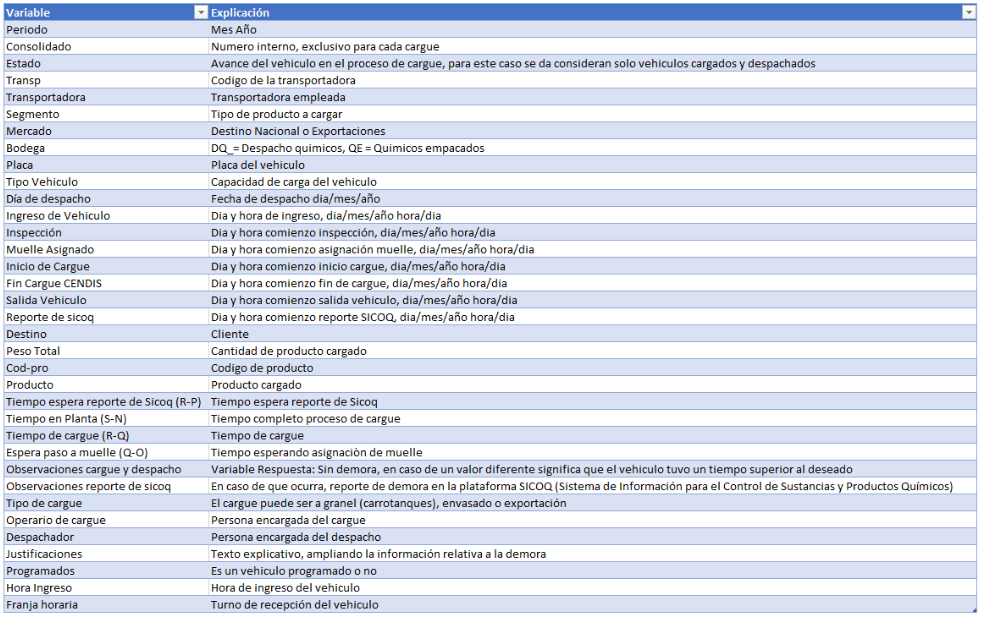



In [4]:
data2022 = pd.read_excel ('Tiempos 2022 QM.xlsx')

In [5]:
data2022.head()

,Periodo,Consolidado,Estado,Transp,Transportadora,Segmento,Mercado,Bodega,Placa,Tipo Vehiculo,...,HORA INGRESO,FRANJA HORARIA,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,202201.0,782122.0,Salida de Planta,5056.0,VIGIA,QUIMI,NACIONAL,DQ,SYS778,Mula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202201.0,782123.0,Fin de Cargue,5115.0,BETANIA,QUIMI,NACIONAL,DQ,SKG311,Mula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202201.0,782129.0,Salida de Planta,5056.0,VIGIA,QUIMI,NACIONAL,QE,SRR778,Sencillo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202201.0,782132.0,Salida de Planta,5056.0,VIGIA,QUIMI,NACIONAL,QE,WDF013,Sencillo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202201.0,782221.0,Fin de Cargue,5115.0,BETANIA,QUIMI,NACIONAL,DQ,XVB147,Sencillo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Periodo                               5248 non-null   float64       
 1   Consolidado                           5248 non-null   float64       
 2   Estado                                5248 non-null   object        
 3   Transp                                5248 non-null   float64       
 4   Transportadora                        5248 non-null   object        
 5   Segmento                              5248 non-null   object        
 6   Mercado                               5248 non-null   object        
 7   Bodega                                5248 non-null   object        
 8   Placa                                 5248 non-null   object        
 9   Tipo Vehiculo                         5248 non-null   object        
 10  

In [7]:
data2023 = pd.read_excel ('Tiempos 2023 QM.xlsx')

In [8]:
data2023.head()

,Periodo,Consolidado,Estado,Transp,Transportadora,Segmento,Mercado,Bodega,Placa,Tipo Vehiculo,...,Observaciones cargue y despacho,Observaciones reporte de sicoq,Tipo de cargue,Operario de cargue,Despachador,Justificaciones,Justificaciones sicoq,PROGRAMADOS,HORA INGRESO,FRANJA HORARIA
0,202301,843728,Fin de Cargue,5115,BETANIA,QUIMI,NACIONAL,DQ,LPZ021,Mula,...,ACUMULACION DE VEHICULOS,DEMORA EN DOCUMENTOS,GRANEL,OSCAR PACHON,CARLOS CASTILLO,CCITE VENCIDO,NaN,PROGRAMADOS,11:25:32,1
1,202301,843738,En Transito,5115,BETANIA,QUIMI,NACIONAL,DQ,SKN620,Mula,...,DEMORA ENTREGA,NO APLICA,GRANEL,MIGUEL MORENO,EDGAR FORERO,DEMORA EN ENTREGA POR PARTE DE PLANTA DE QUIMICOS,NaN,PROGRAMADOS,15:06:53,3
2,202301,843889,En Transito,5115,BETANIA,QUIMI,NACIONAL,DQ,SKN617,Mula,...,SIN DEMORA,SIN DEMORA,GRANEL,MIGUEL MORENO,EDGAR FORERO,SIN NOVEDAD,NaN,PROGRAMADOS,16:25:00,3
3,202301,843896,Entrega Completa,5115,BETANIA,QUIMI,NACIONAL,QE,TLZ939,Sencillo,...,SIN DEMORA,NO APLICA,GRANEL,MIKE ALVAREZ,CARLOS CASTILLO,SIN NOVEDAD,NaN,PROGRAMADOS,15:07:56,3
4,202301,843906,En Transito,5115,BETANIA,QUIMI,NACIONAL,DQ,WMZ022,Sencillo,...,ACUMULACION DE VEHICULOS,SIN DEMORA,GRANEL,MIGUEL MORENO,CARLOS CASTILLO,ESPERA TURNO DE CARGUE,NaN,PROGRAMADOS,14:00:52,2


In [9]:
data2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Periodo                               976 non-null    int64         
 1   Consolidado                           976 non-null    int64         
 2   Estado                                975 non-null    object        
 3   Transp                                976 non-null    int64         
 4   Transportadora                        976 non-null    object        
 5   Segmento                              976 non-null    object        
 6   Mercado                               976 non-null    object        
 7   Bodega                                976 non-null    object        
 8   Placa                                 976 non-null    object        
 9   Tipo Vehiculo                         976 non-null    object        
 10  Dí

In [10]:
data = pd.concat([data2022, data2023], axis=0)
data.reset_index(drop=True, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6505 entries, 0 to 6504
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Periodo                               6224 non-null   float64       
 1   Consolidado                           6224 non-null   float64       
 2   Estado                                6223 non-null   object        
 3   Transp                                6224 non-null   float64       
 4   Transportadora                        6224 non-null   object        
 5   Segmento                              6224 non-null   object        
 6   Mercado                               6224 non-null   object        
 7   Bodega                                6224 non-null   object        
 8   Placa                                 6224 non-null   object        
 9   Tipo Vehiculo                         6224 non-null   object        
 10  

## 4. Limpieza de datos (Data Cleaning)

In [12]:
#Borrando columnas que no se emplearán

# El Periodo puede ser eliminado, ya que se desea hacer una segmentación de acuerdo al dia de la semana
data.drop(['Periodo'], axis='columns', inplace=True)

# El Consolidado puede ser eliminado, ya que es un numero interno de seguimiento, que no aporta información al proceso
data.drop(['Consolidado'], axis='columns', inplace=True)

# Estado, avance del vehiculo en el proceso de cargue, para este caso todos los vehiculos han sido cargados y despachados
data.drop(['Estado'], axis='columns', inplace=True)

# Codigo de la transportadora, se conserva el nombre de la transportadora
data.drop(['Transp'], axis='columns', inplace=True)

# Segmento, variable que ya no es necesaria, ya que es rebundante con el producto
data.drop(['Segmento'], axis='columns', inplace=True)

# Se elimina tambien la variable Placa, que cuenta con 277 variables diferentes
data.drop(['Placa'], axis='columns', inplace=True)

# Día de despacho, variable que ya no es necesaria, esta información se toma de Ingreso de Vehiculo, segmentada por dia de ingreso
data.drop(['Día de despacho'], axis='columns', inplace=True)

# Como se desea construir un modelo que estime la posible de retraso en un cargue, esta alerta debe ir ligada al momento de
# llegada del vehiculo a planta, por lo que información obtenida con posterioridad no sera considerada.

# Se elimina Inspección, dato que se obtiene de manera posterior al ingreso de vehiculo
data.drop(['Inspección'], axis='columns', inplace=True)

# Se elimina Muelle Asignado, dato que se obtiene de manera posterior al ingreso de vehiculo
data.drop(['Muelle Asignado'], axis='columns', inplace=True)

# Se elimina Inicio de Cargue, dato que se obtiene de manera posterior al ingreso de vehiculo
data.drop(['Inicio de Cargue'], axis='columns', inplace=True)

# Se elimina Fin Cargue CENDIS, dato que se obtiene de manera posterior al ingreso de vehiculo
data.drop(['Fin Cargue CENDIS'], axis='columns', inplace=True)

# Se elimina Salida Vehiculo, dato que se obtiene de manera posterior al ingreso de vehiculo
data.drop(['Salida Vehiculo'], axis='columns', inplace=True)

# Reporte de sicoq, variable que solo aplica para una fracción de los productos cargados, dato que se obtiene de manera posterior al ingreso de vehiculo
data.drop(['Reporte de sicoq'], axis='columns', inplace=True)

# Destino, corresponde al cliente al que se hizo despacho, pero la operación a revisar esta limitada a la salida del vehiculo
# de planta, por lo que puede ser eliminada
data.drop(['Destino'], axis='columns', inplace=True)

# Codigo del producto cargado
data.drop(['Cod-pro'], axis='columns', inplace=True)

# Tiempo espera reporte de Sicoq (R-P), variable tipo objeto, dato que se obtiene de manera posterior al ingreso de vehiculo
data.drop(['Tiempo espera reporte de Sicoq (R-P)'], axis='columns', inplace=True)

# Tiempo en Planta (S-N), variable tipo objeto, que puede ser calculada a partir de las otras variables
# datetime que componen el dataset
data.drop(['Tiempo en Planta (S-N)'], axis='columns', inplace=True)

# Tiempo de cargue (R-Q), variable tipo objeto, que puede ser calculada a partir de las otras variables
# datetime que componen el dataset
data.drop(['Tiempo de cargue (R-Q)'], axis='columns', inplace=True)

# Espera paso a muelle (Q-O), variable tipo objeto, que puede ser calculada a partir de las otras variables
# datetime que componen el dataset
data.drop(['Espera paso a muelle (Q-O)'], axis='columns', inplace=True)

# Observaciones para el caso de demoras en el reporte SICOQ
data.drop(['Observaciones reporte de sicoq'], axis='columns', inplace=True)

# PROGRAMADOS, variable introducida recientemente pero que solo cubre una pequeña fracción de los datos, 
# ademas de que los parametros para programación estan en un proceso de revisión
data.drop(['PROGRAMADOS '], axis='columns', inplace=True)

# HORA INGRESO, variable introducida recientemente pero que solo cubre una pequeña fracción de los datos,
# ademas de que puede deducirse de la variable "Ingreso de Vehiculo"
data.drop(['HORA INGRESO'], axis='columns', inplace=True)

# FRANJA HORARIA, variable introducida recientemente pero que solo cubre una pequeña fracción de los datos,
# ademas de que puede deducirse de la variable "Ingreso de Vehiculo"
data.drop(['FRANJA HORARIA'], axis='columns', inplace=True)

# Justificaciones, variable de texto abierta
data.drop(['Justificaciones'], axis='columns', inplace=True)

#Variables sin información
data = data.drop(['Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42'], axis=1)

# Justificaciones sicoq, variable que solo aplica para una fracción de los productos cargados, 
data.drop(['Justificaciones sicoq'], axis='columns', inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6505 entries, 0 to 6504
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Transportadora                   6224 non-null   object        
 1   Mercado                          6224 non-null   object        
 2   Bodega                           6224 non-null   object        
 3   Tipo Vehiculo                    6224 non-null   object        
 4   Ingreso de Vehiculo              6224 non-null   datetime64[ns]
 5   Peso Total                       6225 non-null   float64       
 6   Producto                         6224 non-null   object        
 7   Observaciones cargue y despacho  6223 non-null   object        
 8   Tipo de cargue                   6223 non-null   object        
 9   Operario de cargue               6222 non-null   object        
 10  Despachador                      6222 non-null   object     

In [14]:
data.head()

,Transportadora,Mercado,Bodega,Tipo Vehiculo,Ingreso de Vehiculo,Peso Total,Producto,Observaciones cargue y despacho,Tipo de cargue,Operario de cargue,Despachador
0,VIGIA,NACIONAL,DQ,Mula,2022-01-03 08:29:29,31.14,SODA CAUSTICA LIQ. AL 48.5%MIN,FALLA DEL SISTEMA,GRANEL,MIGUEL MORENO,EDGAR FORERO
1,BETANIA,NACIONAL,DQ,Mula,2022-01-03 12:06:53,26.40,SODA CAUSTICA LIQ. AL 48.5%MIN,FALLA DEL SISTEMA,GRANEL,MIKE ALVAREZ,CARLOS CASTILLO
2,VIGIA,NACIONAL,QE,Sencillo,2022-01-03 12:34:46,8.64,ACIDO CLORHIDRICO AL33%TBX55GL,ACUMULACION DE VEHICULOS,ENVASADO,OSCAR PACHON,CARLOS CASTILLO
3,VIGIA,NACIONAL,QE,Sencillo,2022-01-03 11:32:53,8.64,ACIDO CLORHIDRICO AL33%TBX55GL,SIN DEMORA,ENVASADO,OSCAR PACHON,CARLOS CASTILLO
4,BETANIA,NACIONAL,DQ,Sencillo,2022-01-03 13:45:04,9.85,CLORURO DE CALCIO LIQ. AL 38%,SIN DEMORA,GRANEL,MIKE ALVAREZ,CARLOS CASTILLO


In [15]:
# eliminación de registros duplicados
data=data.drop_duplicates()

# eliminación de nulos
data = data.dropna()

#Reiniciar el indice
data.reset_index(drop=True, inplace=True) 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Transportadora                   6217 non-null   object        
 1   Mercado                          6217 non-null   object        
 2   Bodega                           6217 non-null   object        
 3   Tipo Vehiculo                    6217 non-null   object        
 4   Ingreso de Vehiculo              6217 non-null   datetime64[ns]
 5   Peso Total                       6217 non-null   float64       
 6   Producto                         6217 non-null   object        
 7   Observaciones cargue y despacho  6217 non-null   object        
 8   Tipo de cargue                   6217 non-null   object        
 9   Operario de cargue               6217 non-null   object        
 10  Despachador                      6217 non-null   object     

In [17]:
for col in data.columns:
    print("="*5 + f" {col} " + "="*20)
    print(data[col].value_counts())
    print()

===== Transportadora ====================
BETANIA               3797
VIGIA                 1553
VLIMAR                 488
TRANSPORTE DIRECTO     227
COLTANQUES             127
INANTRA                 23
ADISPETROL               2
Name: Transportadora, dtype: int64

===== Mercado ====================
NACIONAL         6067
EXPORTACIONES     150
Name: Mercado, dtype: int64

===== Bodega ====================
DQ    4751
QE    1466
Name: Bodega, dtype: int64

===== Tipo Vehiculo ====================
Sencillo         2483
Mula             2402
Minimula          574
Dobletroque       504
Contenedor 20     156
Turbo              93
SIN DEFINIR         5
Name: Tipo Vehiculo, dtype: int64

===== Ingreso de Vehiculo ====================
2022-09-01 15:39:27    3
2022-05-09 14:45:10    3
2022-03-29 11:18:55    3
2022-10-12 12:09:17    3
2022-05-13 08:41:34    3
                      ..
2022-06-02 15:09:05    1
2022-06-02 11:22:33    1
2022-06-02 16:21:53    1
2022-06-02 15:30:21    1
2023-03-11 15:

In [18]:
# Se conservan los valores diferentes de "SIN DEFINIR" de la variable "Tipo vehiculo" de la base de datos

data = data[data['Tipo Vehiculo']!='SIN DEFINIR']

# Se eliminan los valores errados de la variable "Tipo cargue" de base de datos

data = data[data['Tipo de cargue']!='TIEMPO DE ALMUERSO/CENA']
data = data[data['Tipo de cargue']!='TDZ592']
data = data[data['Tipo de cargue']!='LPZ021']
data = data[data['Tipo de cargue']!='VCN721']


In [19]:
for col in data.columns:
    print("="*5 + f" {col} " + "="*20)
    print(data[col].value_counts())
    print()

===== Transportadora ====================
BETANIA               3795
VIGIA                 1553
VLIMAR                 487
TRANSPORTE DIRECTO     222
COLTANQUES             127
INANTRA                 23
ADISPETROL               2
Name: Transportadora, dtype: int64

===== Mercado ====================
NACIONAL         6059
EXPORTACIONES     150
Name: Mercado, dtype: int64

===== Bodega ====================
DQ    4745
QE    1464
Name: Bodega, dtype: int64

===== Tipo Vehiculo ====================
Sencillo         2483
Mula             2400
Minimula          574
Dobletroque       503
Contenedor 20     156
Turbo              93
Name: Tipo Vehiculo, dtype: int64

===== Ingreso de Vehiculo ====================
2022-09-01 15:39:27    3
2022-02-01 12:56:40    3
2022-05-09 14:45:10    3
2022-05-19 16:34:07    3
2022-10-25 17:30:37    3
                      ..
2022-06-02 11:22:33    1
2022-06-02 16:21:53    1
2022-06-02 15:30:21    1
2022-06-02 17:44:36    1
2023-03-11 15:45:20    1
Name: Ingre

## 5. Generación nuevas variables de entrada

In [20]:
data['hora entrada'] = data['Ingreso de Vehiculo'].dt.hour

data['Dia semana'] = data['Ingreso de Vehiculo'].dt.strftime('%A')

# Justificaciones, variable de texto abierta
data.drop(['Ingreso de Vehiculo'], axis='columns', inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6209 entries, 0 to 6216
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transportadora                   6209 non-null   object 
 1   Mercado                          6209 non-null   object 
 2   Bodega                           6209 non-null   object 
 3   Tipo Vehiculo                    6209 non-null   object 
 4   Peso Total                       6209 non-null   float64
 5   Producto                         6209 non-null   object 
 6   Observaciones cargue y despacho  6209 non-null   object 
 7   Tipo de cargue                   6209 non-null   object 
 8   Operario de cargue               6209 non-null   object 
 9   Despachador                      6209 non-null   object 
 10  hora entrada                     6209 non-null   int64  
 11  Dia semana                       6209 non-null   object 
dtypes: float64(1), int64

## 6. Transformación variable de salida

Se construyo la variable categorica respuesta, que indica si un vehiculo presento o no demora en el cargue, de acuerdo a las metas indicadas por la compañia

Siendo 1 = Cargue dentro del tiempo deseado, 0 = Cargue con algun tipo de demora

In [22]:
# Aplicación de la función de get_dummies

d =pd.get_dummies(data['Observaciones cargue y despacho'], drop_first=0)

In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6209 entries, 0 to 6216
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   ACUMULACION DE VEHICULOS           6209 non-null   uint8
 1   CAMBIO DE CONSOLIDADO              6209 non-null   uint8
 2   CERTIFICADO DE CALIDAD             6209 non-null   uint8
 3   DEMORA ENTREGA                     6209 non-null   uint8
 4   DISPONIBILIDAD DE MONTACARGAS      6209 non-null   uint8
 5   FALLA DEL SISTEMA                  6209 non-null   uint8
 6   FALTA DE INVENTARIO                6209 non-null   uint8
 7   FALTA PERSONAL DE CARGUE           6209 non-null   uint8
 8   FallA DEL SISTEMA                  6209 non-null   uint8
 9   HORA ALMUERZO                      6209 non-null   uint8
 10  INGRESO FUERA DE HORARIO           6209 non-null   uint8
 11  MANTENIMIENTOS                     6209 non-null   uint8
 12  MONTACARGAS FUERA DE

In [24]:
d.columns.values[15] = 'DEMORA CARGUE'

In [25]:
data = pd.concat([data, d.iloc[:, 15]], axis=1)

data.reset_index(drop=True, inplace=True)

In [26]:
# Observaciones para el caso de demoras en el reporte SICOQ
data.drop(['Observaciones cargue y despacho'], axis='columns', inplace=True)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6209 entries, 0 to 6208
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transportadora      6209 non-null   object 
 1   Mercado             6209 non-null   object 
 2   Bodega              6209 non-null   object 
 3   Tipo Vehiculo       6209 non-null   object 
 4   Peso Total          6209 non-null   float64
 5   Producto            6209 non-null   object 
 6   Tipo de cargue      6209 non-null   object 
 7   Operario de cargue  6209 non-null   object 
 8   Despachador         6209 non-null   object 
 9   hora entrada        6209 non-null   int64  
 10  Dia semana          6209 non-null   object 
 11  DEMORA CARGUE       6209 non-null   uint8  
dtypes: float64(1), int64(1), object(9), uint8(1)
memory usage: 539.8+ KB


In [28]:
for col in data.columns:
    print("="*5 + f" {col} " + "="*20)
    print(data[col].value_counts())
    print()

===== Transportadora ====================
BETANIA               3795
VIGIA                 1553
VLIMAR                 487
TRANSPORTE DIRECTO     222
COLTANQUES             127
INANTRA                 23
ADISPETROL               2
Name: Transportadora, dtype: int64

===== Mercado ====================
NACIONAL         6059
EXPORTACIONES     150
Name: Mercado, dtype: int64

===== Bodega ====================
DQ    4745
QE    1464
Name: Bodega, dtype: int64

===== Tipo Vehiculo ====================
Sencillo         2483
Mula             2400
Minimula          574
Dobletroque       503
Contenedor 20     156
Turbo              93
Name: Tipo Vehiculo, dtype: int64

===== Peso Total ====================
19.200    196
7.860     138
9.432     125
8.000     107
9.000      88
         ... 
2.960       1
7.336       1
33.110      1
14.930      1
9.500       1
Name: Peso Total, Length: 1225, dtype: int64

===== Producto ====================
SODA CAUSTICA LIQ. AL 48.5%MIN      1663
ACIDO CLORHIDRICO 

## 7. Visualización de datos

### Variables de entrada

In [29]:
#Lista de variables categóricas
catCols = data.select_dtypes(include = ["object", 'category']).columns.tolist()

data[catCols].head()

,Transportadora,Mercado,Bodega,Tipo Vehiculo,Producto,Tipo de cargue,Operario de cargue,Despachador,Dia semana
0,VIGIA,NACIONAL,DQ,Mula,SODA CAUSTICA LIQ. AL 48.5%MIN,GRANEL,MIGUEL MORENO,EDGAR FORERO,Monday
1,BETANIA,NACIONAL,DQ,Mula,SODA CAUSTICA LIQ. AL 48.5%MIN,GRANEL,MIKE ALVAREZ,CARLOS CASTILLO,Monday
2,VIGIA,NACIONAL,QE,Sencillo,ACIDO CLORHIDRICO AL33%TBX55GL,ENVASADO,OSCAR PACHON,CARLOS CASTILLO,Monday
3,VIGIA,NACIONAL,QE,Sencillo,ACIDO CLORHIDRICO AL33%TBX55GL,ENVASADO,OSCAR PACHON,CARLOS CASTILLO,Monday
4,BETANIA,NACIONAL,DQ,Sencillo,CLORURO DE CALCIO LIQ. AL 38%,GRANEL,MIKE ALVAREZ,CARLOS CASTILLO,Monday


In [30]:
#Lista de variables numéricas

numCols=data.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
data[numCols].head()

,Peso Total,hora entrada
0,31.14,8
1,26.40,12
2,8.64,12
3,8.64,11
4,9.85,13


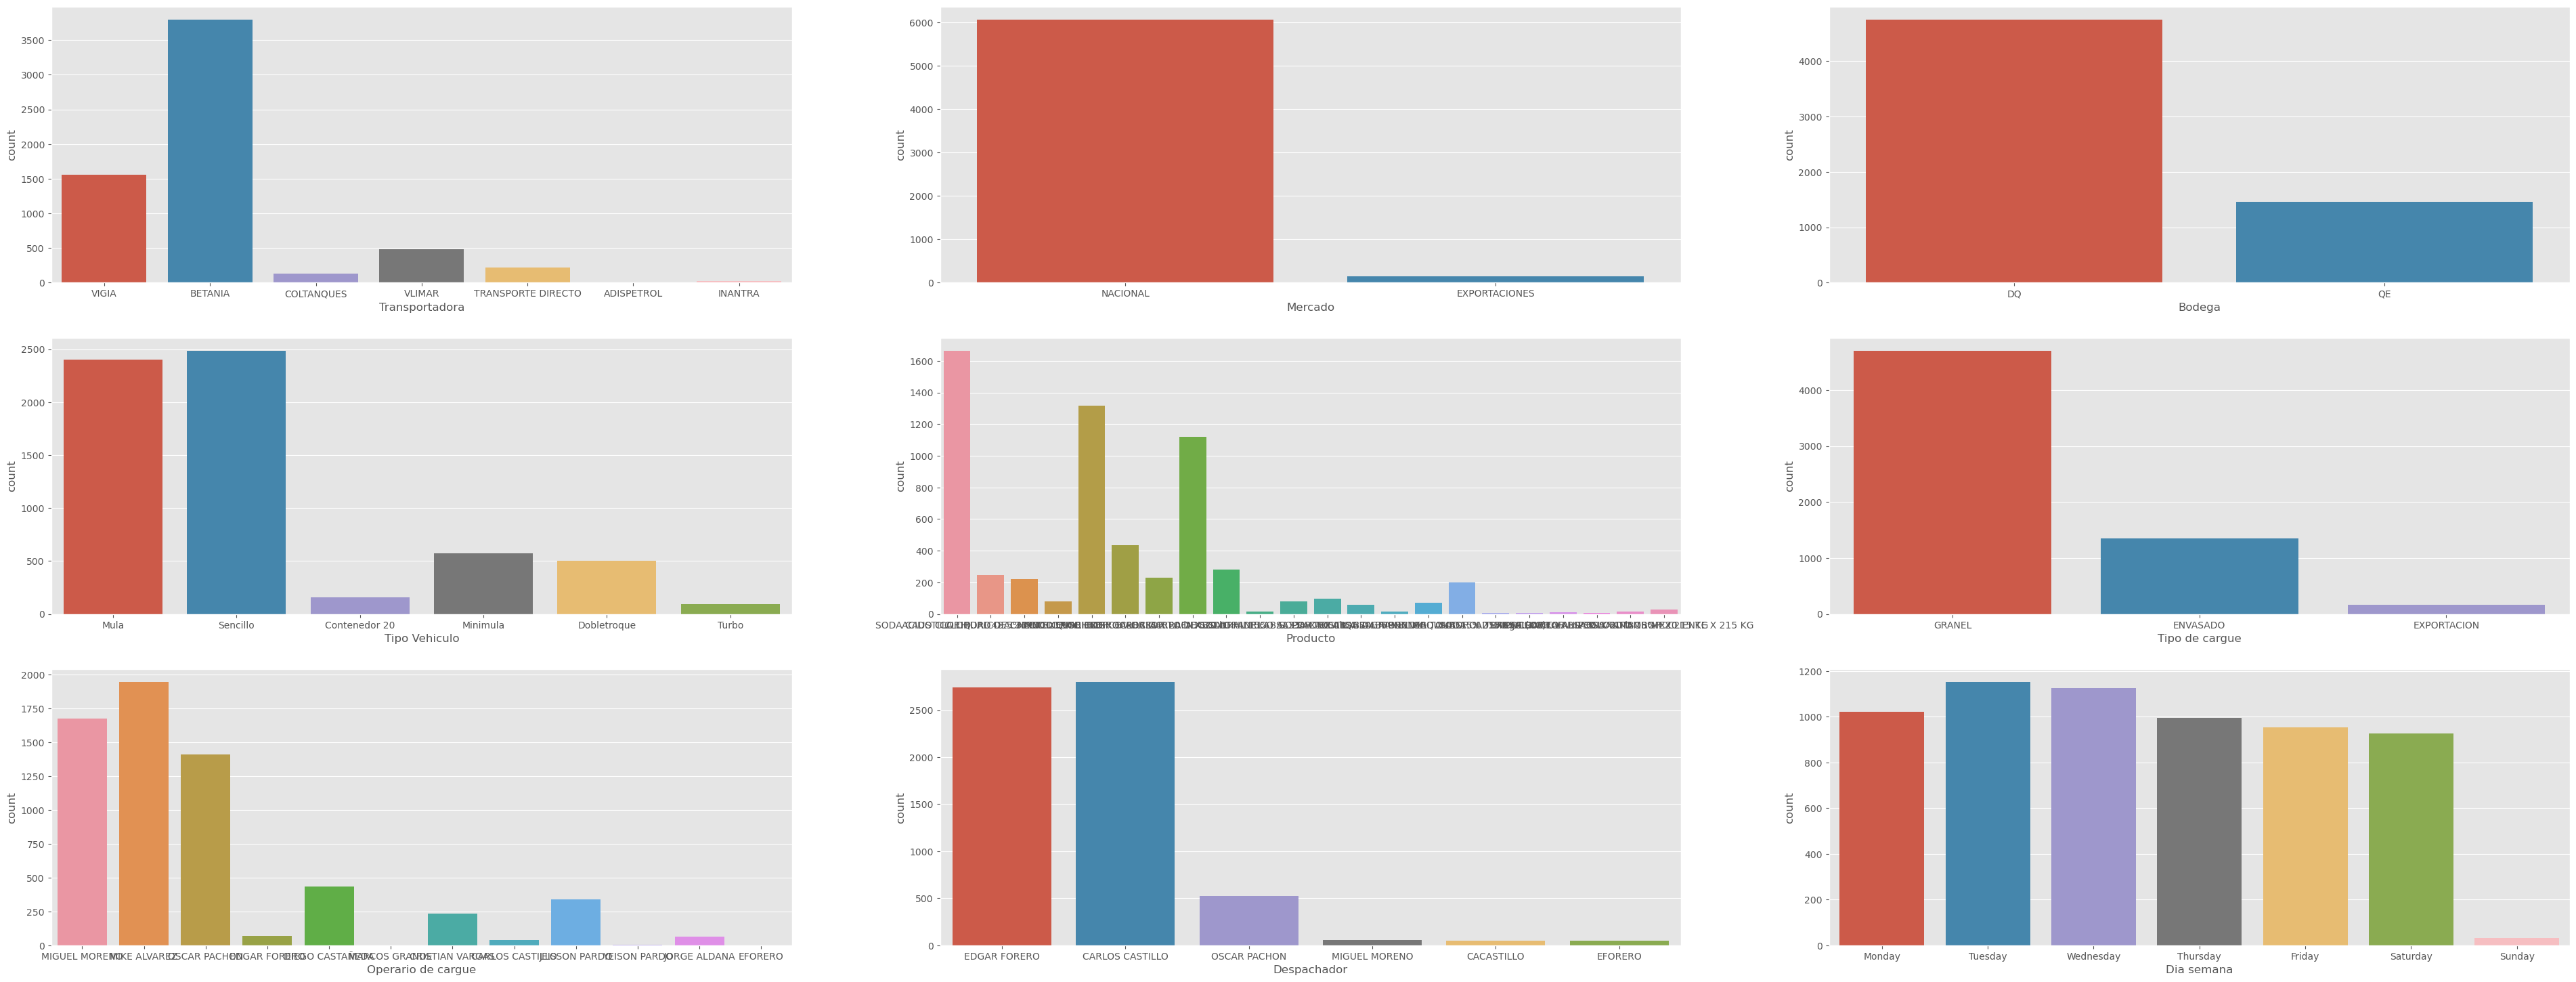

In [31]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(data,catCols, 3, 3, 'c', None, (48,18))

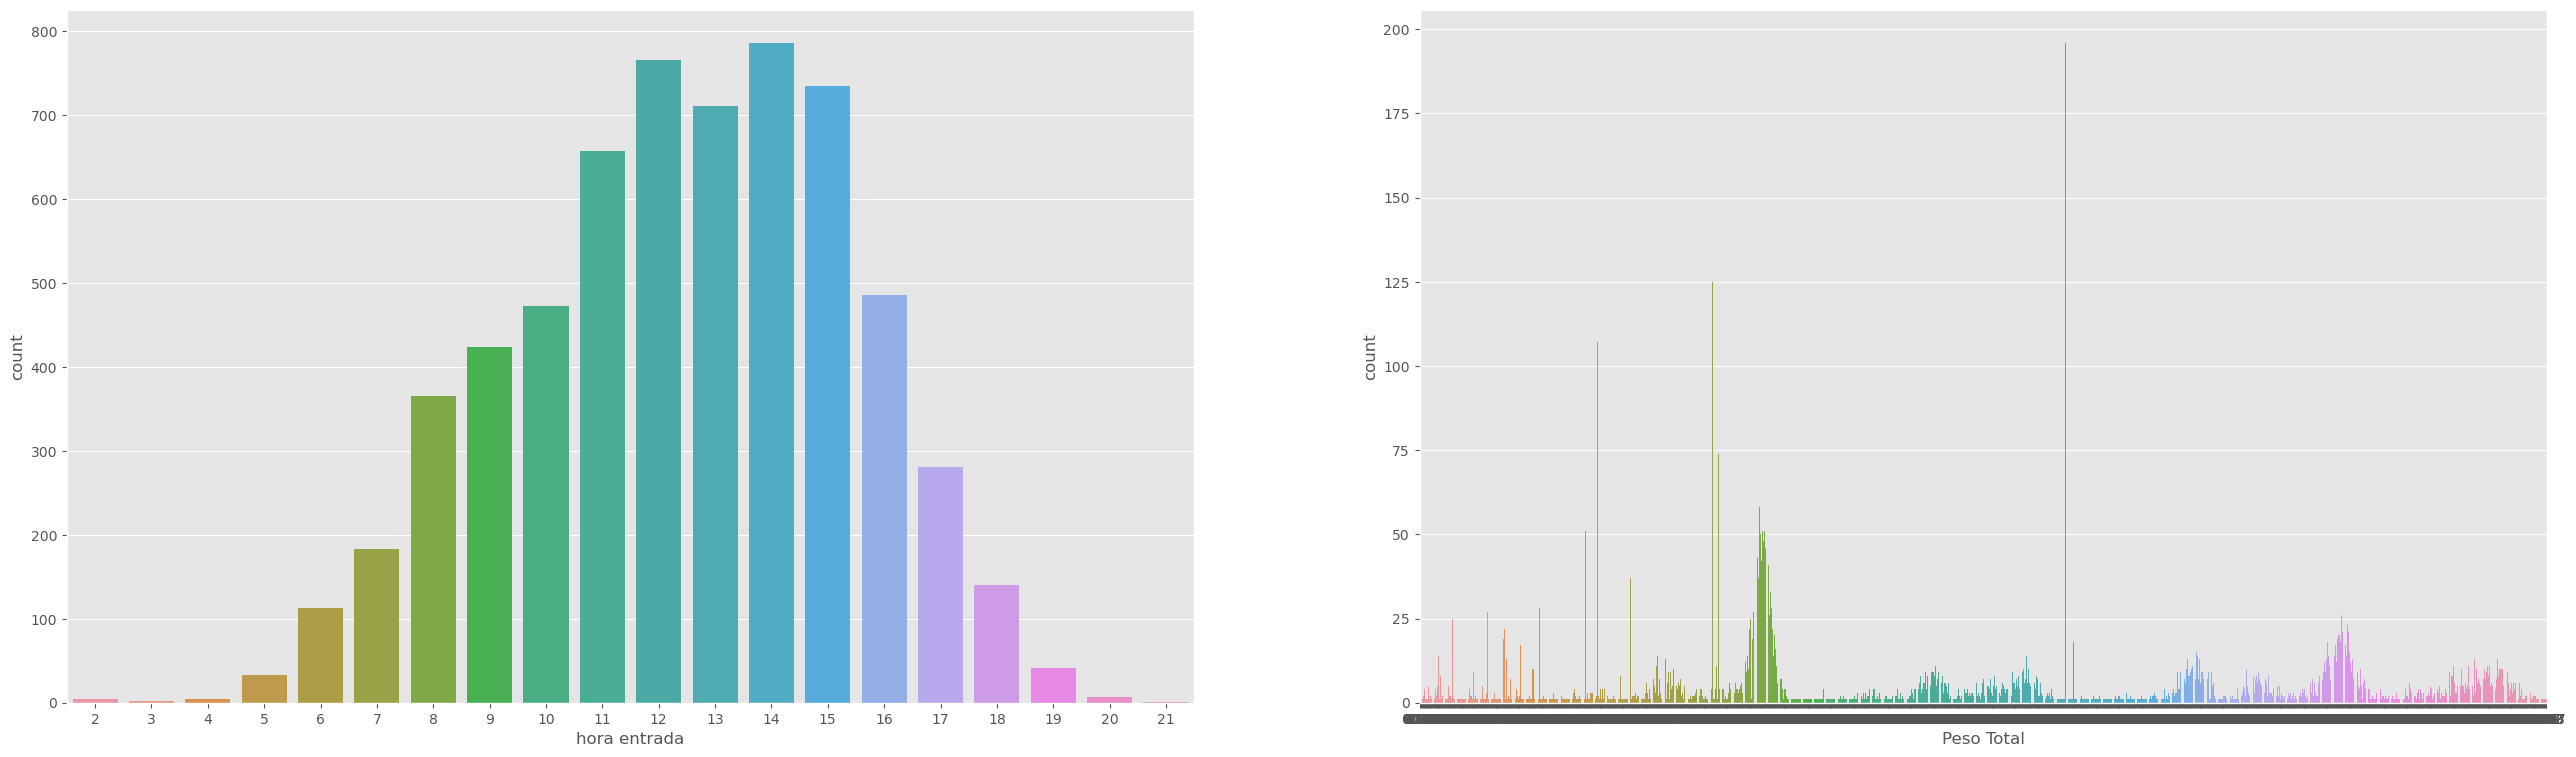

In [32]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(data,['hora entrada', 'Peso Total'], 2, 1, 'c', None, (32,9))

### Variables de salida

In [33]:
# Distriución de la variable de salida

print("="*5 + f" {col} " + "="*20)
print(data['DEMORA CARGUE'].value_counts())

===== DEMORA CARGUE ====================
0    3246
1    2963
Name: DEMORA CARGUE, dtype: int64


## 8. Preparación de datos

Se hace verificación de presencia de nulos dentro del Dataset

In [34]:
# Identificación de valores nulos para las variables numéricas
for col in data[numCols]:
    print (col, np.sum(pd.isnull(data[col])))

Peso Total 0
hora entrada 0


In [35]:
# Identificación de valores nulos para las variables categóricas
for col in data[catCols]:
    print (col, np.sum(pd.isnull(data[col])))

Transportadora 0
Mercado 0
Bodega 0
Tipo Vehiculo 0
Producto 0
Tipo de cargue 0
Operario de cargue 0
Despachador 0
Dia semana 0


### Valores atípicos para las variables de entrada

In [36]:
#utilización de LocalOutlierFactor con 11 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=11
lof = LocalOutlierFactor(n_neighbors=11, contamination=0.05)

# identificar los valires atípicos por medio de lof 
y_pred = lof.fit_predict(data[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', data[outliers].index.tolist())

Indices de valores atípicos:  [28, 31, 64, 75, 96, 108, 109, 114, 160, 165, 175, 195, 230, 265, 312, 316, 319, 342, 351, 353, 468, 492, 548, 550, 566, 590, 592, 618, 623, 624, 655, 660, 668, 676, 728, 731, 749, 752, 772, 778, 808, 845, 857, 900, 936, 994, 1035, 1036, 1037, 1073, 1080, 1119, 1137, 1149, 1184, 1205, 1248, 1250, 1259, 1261, 1290, 1304, 1318, 1346, 1360, 1367, 1396, 1423, 1443, 1450, 1507, 1512, 1565, 1608, 1622, 1644, 1645, 1665, 1668, 1700, 1754, 1803, 1824, 1827, 1862, 1888, 1889, 1910, 1913, 1914, 1927, 1938, 1942, 1989, 1999, 2013, 2018, 2085, 2089, 2095, 2120, 2139, 2144, 2197, 2215, 2237, 2260, 2294, 2295, 2330, 2332, 2335, 2368, 2371, 2413, 2418, 2432, 2436, 2452, 2457, 2518, 2527, 2535, 2574, 2597, 2617, 2641, 2653, 2659, 2670, 2673, 2684, 2687, 2746, 2766, 2773, 2830, 2850, 2854, 2855, 2910, 2916, 2927, 2969, 2977, 3009, 3058, 3092, 3097, 3110, 3112, 3148, 3173, 3186, 3229, 3283, 3290, 3314, 3339, 3357, 3396, 3409, 3432, 3433, 3434, 3449, 3495, 3518, 3549, 3573, 

In [37]:
# Eliminar los valores atípicos del dataframe original
data = data.loc[~outliers]

### Transformaciones

In [38]:
for col in data.columns:
    print("="*5 + f" {col} " + "="*20)
    print(data[col].value_counts())
    print()

===== Transportadora ====================
BETANIA               3573
VIGIA                 1508
VLIMAR                 454
TRANSPORTE DIRECTO     221
COLTANQUES             118
INANTRA                 23
ADISPETROL               1
Name: Transportadora, dtype: int64

===== Mercado ====================
NACIONAL         5757
EXPORTACIONES     141
Name: Mercado, dtype: int64

===== Bodega ====================
DQ    4550
QE    1348
Name: Bodega, dtype: int64

===== Tipo Vehiculo ====================
Mula             2365
Sencillo         2246
Minimula          568
Dobletroque       480
Contenedor 20     147
Turbo              92
Name: Tipo Vehiculo, dtype: int64

===== Peso Total ====================
19.200    187
7.860     138
9.432     125
8.000     105
9.000      88
         ... 
8.520       1
33.320      1
31.380      1
15.510      1
9.500       1
Name: Peso Total, Length: 1140, dtype: int64

===== Producto ====================
SODA CAUSTICA LIQ. AL 48.5%MIN      1590
ACIDO CLORHIDRICO 

In [39]:
# Se crea una nueva categoria para las otras transportadoras

data = data.replace({'VLIMAR': 'OTRA TRANSPORTADORA',
                    'TRANSPORTE DIRECTO': 'OTRA TRANSPORTADORA', 
                    'COLTANQUES': 'OTRA TRANSPORTADORA',
                    'INANTRA': 'OTRA TRANSPORTADORA',
                    'ADISPETROL': 'OTRA TRANSPORTADORA'})

In [40]:
# Se unifican los productos cargados en granel, tambor, garrafa o IBC

data = data.replace({'PISCICLOR GARRAFA X 20 lt': 'GARRAFA',
                    'ACIDO CLORHIDRICO AL33%TBX55GL': 'TAMBOR', 
                    'AGROCLOR GARRAFA X 20 lt': 'GARRAFA', 
                    'HIPOCLORITO AL 15% TBX55G.(KG)': 'TAMBOR',
                    'SODA CAUSTICA 20L': 'GARRAFA',
                    'HIPOCLORITO IBC': 'IBC',
                    'LABSA POR IBC': 'IBC',
                    'LABSA BRENNTAG TAMBOR X 215 Kg': 'TAMBOR',
                    'LABSA TAMBOR ME CLIENTE X 215 KG': 'TAMBOR',
                    'ACIDO CLORHIDRICO AL33%X1000lt': 'IBC',
                    'LABSA A GRANEL MAQUILAS': 'LABSA GRANEL',
                    ' LABSA DISAN TAMBOR X 215 KG': 'TAMBOR',
                    'ACIDO CLORHIDRICO AL33%TBX55GL': 'TAMBOR',
                    'PISCICLOR HIPOCLORITO 15% X20': 'GARRAFA',
                    'SODA CAUSTICA 1000 L': 'IBC',
                    'LABSA GARRAFA': 'GARRAFA',
                    'HIPOCLORITO AL 13% X 20 lt': 'GARRAFA'})

In [41]:
# Se agrupan los Operarios de cargue

data['Operario de cargue'] = data['Operario de cargue'].replace({'DIEGO CASTAÑEDA': 'OTRO OPERARIO',
                                                                'JEISSON PARDO': 'OTRO OPERARIO', 
                                                                'CRISTIAN VARGAS': 'OTRO OPERARIO', 
                                                                'EDGAR FORERO': 'OTRO OPERARIO',
                                                                'CARLOS CASTILLO': 'OTRO OPERARIO',
                                                                'YEISON PARDO': 'OTRO OPERARIO',
                                                                'MARCOS GRANDE': 'OTRO OPERARIO',
                                                                'JORGE ALDANA': 'OTRO OPERARIO',
                                                                'EFORERO': 'OTRO OPERARIO'})

In [42]:
# Se agrupan los Despachadores

data['Despachador'] = data['Despachador'].replace({'OSCAR PACHON': 'OTRO DESPACHADOR',
                                                    'MARCOS GRANDE': 'OTRO DESPACHADOR',
                                                    'MIGUEL MORENO': 'OTRO DESPACHADOR',
                                                    'CACASTILLO': 'CARLOS CASTILLO',
                                                    'EFORERO': 'EDGAR FORERO'})

In [43]:
for col in data.columns:
    print("="*5 + f" {col} " + "="*20)
    print(data[col].value_counts())
    print()

===== Transportadora ====================
BETANIA                3573
VIGIA                  1508
OTRA TRANSPORTADORA     817
Name: Transportadora, dtype: int64

===== Mercado ====================
NACIONAL         5757
EXPORTACIONES     141
Name: Mercado, dtype: int64

===== Bodega ====================
DQ    4550
QE    1348
Name: Bodega, dtype: int64

===== Tipo Vehiculo ====================
Mula             2365
Sencillo         2246
Minimula          568
Dobletroque       480
Contenedor 20     147
Turbo              92
Name: Tipo Vehiculo, dtype: int64

===== Peso Total ====================
19.200    187
7.860     138
9.432     125
8.000     105
9.000      88
         ... 
8.520       1
33.320      1
31.380      1
15.510      1
9.500       1
Name: Peso Total, Length: 1140, dtype: int64

===== Producto ====================
SODA CAUSTICA LIQ. AL 48.5%MIN    1590
ACIDO CLORHIDRICO AL 33%          1276
HIPOCLORITO DE SODIO AL 15%       1070
GARRAFA                            708
TAMBOR  

### Sobremuestreo (oversampling)

In [44]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase 
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(data.drop('DEMORA CARGUE', axis=1), data['DEMORA CARGUE'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=data.columns.drop('DEMORA CARGUE'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
d = pd.concat([df1, df2], axis=1)

In [45]:
# Dataset balanceado
d.head()

,Transportadora,Mercado,Bodega,Tipo Vehiculo,Peso Total,Producto,Tipo de cargue,Operario de cargue,Despachador,hora entrada,Dia semana,DEMORA CARGUE
0,VIGIA,NACIONAL,DQ,Mula,31.14,SODA CAUSTICA LIQ. AL 48.5%MIN,GRANEL,MIGUEL MORENO,EDGAR FORERO,8,Monday,0
1,BETANIA,NACIONAL,DQ,Mula,26.40,SODA CAUSTICA LIQ. AL 48.5%MIN,GRANEL,MIKE ALVAREZ,CARLOS CASTILLO,12,Monday,0
2,VIGIA,NACIONAL,QE,Sencillo,8.64,TAMBOR,ENVASADO,OSCAR PACHON,CARLOS CASTILLO,12,Monday,0
3,VIGIA,NACIONAL,QE,Sencillo,8.64,TAMBOR,ENVASADO,OSCAR PACHON,CARLOS CASTILLO,11,Monday,1
4,BETANIA,NACIONAL,DQ,Sencillo,9.85,CLORURO DE CALCIO LIQ. AL 38%,GRANEL,MIKE ALVAREZ,CARLOS CASTILLO,13,Monday,1


In [46]:
# Distriución de la variable de salida, ya balanceada

print("="*5 + f" {col} " + "="*20)
print(d['DEMORA CARGUE'].value_counts())

===== DEMORA CARGUE ====================
0    3073
1    3073
Name: DEMORA CARGUE, dtype: int64


## 9. Prueba dataset: Creación de un modelo

In [47]:
# Aplicación de la función de get_dummies

d =pd.get_dummies(d, drop_first=1)

In [48]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Peso Total                               6146 non-null   float64
 1   hora entrada                             6146 non-null   int64  
 2   DEMORA CARGUE                            6146 non-null   uint8  
 3   Transportadora_OTRA TRANSPORTADORA       6146 non-null   uint8  
 4   Transportadora_VIGIA                     6146 non-null   uint8  
 5   Mercado_NACIONAL                         6146 non-null   uint8  
 6   Bodega_QE                                6146 non-null   uint8  
 7   Tipo Vehiculo_Dobletroque                6146 non-null   uint8  
 8   Tipo Vehiculo_Minimula                   6146 non-null   uint8  
 9   Tipo Vehiculo_Mula                       6146 non-null   uint8  
 10  Tipo Vehiculo_Sencillo                   6146 no

## 10. Creación del modelo

### Dividir el conjunto de datos

In [49]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='DEMORA CARGUE')
y = d['DEMORA CARGUE']

In [50]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escalar Variables

In [51]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['Peso Total', 'hora entrada']


In [52]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,Peso Total,hora entrada
2153,0.2556,0.5263
403,0.5063,0.2632
2017,0.2788,0.6842
3798,0.2799,0.5789
4720,0.8639,0.6842


## 11. SVM

#### 11.1. Lineal y método de retención (*holdout method*)

##### Creación y entrenamiento del modelo

In [53]:
#Creación del modelo 

modelSVC = svm.SVC(kernel='linear')

#Entrenamiento del modelo con 80% de training
modelSVC.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
y_pred = modelSVC.predict(X_test)

##### Evaluación del modelo

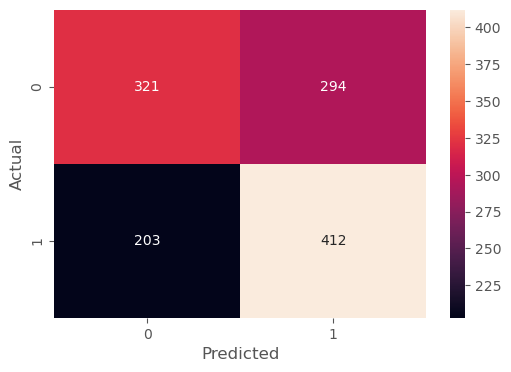

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       615
           1       0.58      0.67      0.62       615

    accuracy                           0.60      1230
   macro avg       0.60      0.60      0.59      1230
weighted avg       0.60      0.60      0.59      1230



In [55]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

In [56]:
#f1-Score
print("f1-score:",metrics.f1_score(y_test, y_pred))

f1-score: 0.6237698713096139


#### 11.2. Lineal y validación cruzada (*Cross validation*)

##### Creación y entrenamiento del modelo

In [57]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns ='DEMORA CARGUE')
y = d['DEMORA CARGUE']

# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

In [58]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

X_Completo[num_vars].head()

,Peso Total,hora entrada
0,0.8923,0.3158
1,0.7564,0.5263
2,0.2476,0.5263
3,0.2476,0.4737
4,0.2822,0.5789


In [59]:
CV = 10 #Folks:  Pliegues
scoring = 'f1'


entries = []
accuracies = cross_val_score(modelSVC, X_Completo, y_Completo, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

#### Evaluación del modelo

In [60]:
print(cv_df)
print('f1-score:', cv_df['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.6233
1         1    0.6051
2         2    0.6152
3         3    0.6348
4         4    0.6319
5         5    0.6250
6         6    0.6206
7         7    0.6254
8         8    0.6811
9         9    0.6154
f1-score: 0.627766614767646


## 12. Afinando el modelo SVM (tuning)

Entre sus parámetros, encontramos:

- C: parámetro de regularización.
- kernel: especifica el tipo de kernel usado por el algoritmo (lineal, polinómico, radial, etc.).
- degree: grado de la función con kernel polinómico.
- gamma: coeficiente del kernel para ‘rbf’, ‘poly’ y ‘sigmoid’.
- probability: indica si se permite la estimación de probabilidades.
- max_iter: límite de iteraciones.
- decision_function_shape: permite establecer el método one-vs-one o one-vs-all.
- random_state: semilla para el generador de número pseudoaleatorios.

El parámetro "C" es el inverso del parámetro λ de regularización por lo cual, si tenemos un valor alto de nuestro parámetro tendremos una mayor varianza y la regularización será menor, mientras que por el contrario, si tenemos un valor bajo, tendremos un mayor efecto de la regularización. Ver: https://dzone.com/articles/support-vector-machines-tutorial

#### 12.1. Lineal e hiperparámetro *C*  (con validación cruzada - *Cross validation*

##### Identificacion del mejor hiperparametro *C*

In [61]:
#1 Creacion del modelo
svmL = svm.SVC(kernel='linear', random_state = 0)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} 

# definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
metricas = 'f1'

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svmL
                             , param_grid = grid_hiperparametros 
                             , cv = CV
                             , scoring = metricas
                             , return_train_score = True
                             , verbose=4
                             , n_jobs=-1)


# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo)

#busqueda_grid.cv_results_.keys()

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear', random_state=0), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='f1', verbose=4)

In [62]:
#2 Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()

f1_medio_cv = busqueda_grid.cv_results_['mean_test_score'].tolist()
f1_std_cv   = busqueda_grid.cv_results_['std_test_score'].tolist()

In [63]:
#3 Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'mean_test_f1-score': f1_medio_cv,
                                 'std_test_f1-score': f1_std_cv})

print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_)

         C  mean_test_f1-score  std_test_f1-score
0   0.0001              0.4743             0.3108
1   0.0010              0.6754             0.0159
2   0.0100              0.6754             0.0159
3   0.1000              0.6291             0.0194
4   1.0000              0.6278             0.0196
5  10.0000              0.6282             0.0193
6 100.0000              0.6282             0.0193
Valor de coste y grado óptimos: {'C': 0.001}


##### Creación y entrenamiento del modelo

In [64]:
#4 Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmL = svm.SVC(kernel='linear', 
                      C = busqueda_grid.best_params_.get('C'), #C=0.001
                      random_state = 0) # semilla

In [65]:
#5
CV = 10 #Folks:  Pliegues
scoring = 'f1' 

entries = []
accuracies = cross_val_score(modelo_svmL, X_Completo, y_Completo,cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfl = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

#### Evaluación del modelo

In [66]:
#6
print(cv_dfl)
print('f1-Score:', cv_dfl['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.6641
1         1    0.6650
2         2    0.6598
3         3    0.6819
4         4    0.6843
5         5    0.6536
6         6    0.6684
7         7    0.6839
8         8    0.7116
9         9    0.6811
f1-Score: 0.6753727478281577


#### 12.2. Polinómico e hiperparámetros: *C* y *degree*  (con validación cruzada  - *Cross validation*)

##### Identificación del mejor hiperparametro *C* y *degree*

In [67]:
#1 Creacion del modelo
svmP = svm.SVC(kernel='poly', random_state = 0)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                        'degree': [2, 3]} 

# definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
metricas = 'f1'

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svmP 
                             , param_grid = grid_hiperparametros 
                             , cv = CV
                             , scoring = metricas
                             , return_train_score = True
                             , verbose=4
                             , n_jobs=-1)


# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=SVC(kernel='poly', random_state=0), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3]},
             return_train_score=True, scoring='f1', verbose=4)

In [68]:
#2 Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
degree_cv = busqueda_grid.cv_results_['param_degree'].tolist()

f1_medio_cv = busqueda_grid.cv_results_['mean_test_score'].tolist()
f1_std_cv = busqueda_grid.cv_results_['std_test_score'].tolist()

In [69]:
#3 Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'degree': degree_cv, 
                                 'mean_test_f1-score': f1_medio_cv,
                                 'std_test_f1-score': f1_std_cv})
                                 
print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y grado óptimos:', busqueda_grid.best_params_)

          C  degree  mean_test_f1-score  std_test_f1-score
0    0.0001       2              0.4666             0.3059
1    0.0001       3              0.4282             0.2835
2    0.0010       2              0.4666             0.3059
3    0.0010       3              0.4282             0.2835
4    0.0100       2              0.6754             0.0159
5    0.0100       3              0.6724             0.0167
6    0.1000       2              0.6419             0.0233
7    0.1000       3              0.6345             0.0252
8    1.0000       2              0.6256             0.0298
9    1.0000       3              0.6135             0.0324
10  10.0000       2              0.6172             0.0316
11  10.0000       3              0.5880             0.0368
12 100.0000       2              0.6137             0.0339
13 100.0000       3              0.5653             0.0478
Valor de coste y grado óptimos: {'C': 0.01, 'degree': 2}


#### Creación y entrenamiento del modelo

In [70]:
#4 Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmP = svm.SVC(kernel = 'poly', 
                      C = busqueda_grid.best_params_.get('C'), #C=0.1
                      degree = busqueda_grid.best_params_.get('degree'), #degree=2
                      random_state = 0) # semilla

In [71]:
#5
CV = 10 #Folks:  Pliegues
scoring = 'f1' 


entries = []
accuracies = cross_val_score(modelo_svmP, X_Completo, y_Completo, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfP = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

#### Evaluación del modelo

In [72]:
#6
print(cv_dfP)
print('f1-score', cv_dfP['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.6641
1         1    0.6650
2         2    0.6598
3         3    0.6819
4         4    0.6843
5         5    0.6536
6         6    0.6684
7         7    0.6839
8         8    0.7116
9         9    0.6811
f1-score 0.6753727478281577


#### 12.3. Radial e hiperparámetros: *C* y *gamma*  (con validación cruzada  - *Cross validation*)

##### Identificación del mejor hiperparametro *C* y *gamma*

In [73]:
#1 Creacion del modelo
svmR = svm.SVC(kernel='rbf', random_state = 0)



# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                        'gamma': [0.001, 0.01, 0.1, 1, 3, 5]} 
                        
# definicion de la variable con el número de pliegues
CV = 10

# Definimos las metricas sobre las que queremos evaluar
metricas = 'f1'

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svmR
                             , param_grid = grid_hiperparametros 
                             , cv = CV
                             , scoring = metricas
                             , return_train_score = True
                             , verbose=4
                             , n_jobs=-1)


# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 3, 5]},
             return_train_score=True, scoring='f1', verbose=4)

In [74]:
#2 Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
gamma_cv = busqueda_grid.cv_results_['param_gamma'].tolist()

f1_medio_cv = busqueda_grid.cv_results_['mean_test_score'].tolist()
f1_std_cv = busqueda_grid.cv_results_['std_test_score'].tolist()

In [75]:
#3 Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'gamma': gamma_cv, 
                                 'mean_test_f1-score': f1_medio_cv,
                                 'std_test_f1-score': f1_std_cv})
                                 
print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y gamma óptimos:', busqueda_grid.best_params_)

          C  gamma  mean_test_f1-score  std_test_f1-score
0    0.0001 0.0010              0.4743             0.3108
1    0.0001 0.0100              0.4744             0.3108
2    0.0001 0.1000              0.4740             0.3106
3    0.0001 1.0000              0.4387             0.2890
4    0.0001 3.0000              0.4193             0.2840
5    0.0001 5.0000              0.4134             0.2825
6    0.0010 0.0010              0.4743             0.3108
7    0.0010 0.0100              0.4744             0.3108
8    0.0010 0.1000              0.4740             0.3106
9    0.0010 1.0000              0.4387             0.2890
10   0.0010 3.0000              0.4193             0.2840
11   0.0010 5.0000              0.4134             0.2825
12   0.0100 0.0010              0.4743             0.3108
13   0.0100 0.0100              0.4744             0.3108
14   0.0100 0.1000              0.6751             0.0160
15   0.0100 1.0000              0.4387             0.2890
16   0.0100 3.

##### Creación y entrenamiento del modelo

In [76]:
#4 Ajustamos el modelo SVM lineal usando el valor de coste óptimo obtenido en cv
modelo_svmR = svm.SVC(kernel = 'rbf', 
                      C = busqueda_grid.best_params_.get('C'), #C=0.1
                      gamma = busqueda_grid.best_params_.get('gamma'), #gamma=0.01
                      random_state = 0) # semilla  

In [77]:
#5
CV = 10 #Folks:  Pliegues
scoring = 'f1' 


entries = []
accuracies = cross_val_score(modelo_svmR, X_Completo, y_Completo, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfR = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

#### Evaluación del modelo

In [78]:
#6
print(cv_dfR)
print('f1-score', cv_dfR['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.6658
1         1    0.6650
2         2    0.6598
3         3    0.6819
4         4    0.6843
5         5    0.6536
6         6    0.6684
7         7    0.6839
8         8    0.7107
9         9    0.6811
f1-score 0.6754548243955625


#### 12.4. Sigmoide e hiperparámetros: *C* y *gamma*  (con validación cruzada  - *Cross validation*)

##### Identificación del mejor hiperparametro *C* y *gamma*

In [79]:
#1 Creacion del modelo
svmS = svm.SVC(kernel='sigmoid', random_state = 0)


# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100],
                        'gamma': [0.001, 0.01, 0.1, 1, 3, 5]} 
                        
# definicion de la variable con el número de pliegues
CV = 10

# Definimos las metricas sobre las que queremos evaluar
metricas = 'f1'

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svmS
                             , param_grid = grid_hiperparametros 
                             , cv = CV
                             , scoring = metricas
                             , return_train_score = True
                             , verbose=4
                             , n_jobs=-1)


# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=SVC(kernel='sigmoid', random_state=0), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 3, 5]},
             return_train_score=True, scoring='f1', verbose=4)

##### Identificación del mejor hiperparametro *C* y *gamma*

In [80]:
#2 Almacenamos en variables los resultados de la busqueda grid
C_cv = busqueda_grid.cv_results_['param_C'].tolist()
gamma_cv = busqueda_grid.cv_results_['param_gamma'].tolist()

f1_medio_cv = busqueda_grid.cv_results_['mean_test_score'].tolist()
f1_std_cv = busqueda_grid.cv_results_['std_test_score'].tolist()

In [81]:
#3 Generamos un data frame con los resultados de la validacion cruzada
df_resultados_cv = pd.DataFrame({'C': C_cv, 
                                 'gamma': gamma_cv, 
                                 'mean_test_f1-score': f1_medio_cv,
                                 'std_test_f1-score': f1_std_cv})
                                 
print(df_resultados_cv)

# Mejores hiperparametros sobre los datos hold-out
print('Valor de coste y gamma óptimos:', busqueda_grid.best_params_)

          C  gamma  mean_test_f1-score  std_test_f1-score
0    0.0001 0.0010              0.4743             0.3108
1    0.0001 0.0100              0.4743             0.3108
2    0.0001 0.1000              0.4743             0.3108
3    0.0001 1.0000              0.4698             0.3076
4    0.0001 3.0000              0.4560             0.2997
5    0.0001 5.0000              0.2145             0.2962
6    0.0010 0.0010              0.4743             0.3108
7    0.0010 0.0100              0.4743             0.3108
8    0.0010 0.1000              0.4743             0.3108
9    0.0010 1.0000              0.4698             0.3076
10   0.0010 3.0000              0.4560             0.2997
11   0.0010 5.0000              0.2145             0.2962
12   0.0100 0.0010              0.4743             0.3108
13   0.0100 0.0100              0.4743             0.3108
14   0.0100 0.1000              0.6754             0.0159
15   0.0100 1.0000              0.6709             0.0098
16   0.0100 3.

##### Creación y entrenamiento del modelo

In [82]:
#4 Ajustamos el modelo SVM sigmoide usando el valor de coste óptimo obtenido en cv
modelo_svmS = svm.SVC(kernel = 'sigmoid', 
                      C = busqueda_grid.best_params_.get('C'), #C=0.1
                      gamma = busqueda_grid.best_params_.get('gamma'), #gamma=0.1
                      random_state = 0,
                        probability=True) # semilla 

In [83]:
#5
CV = 10 #Folks:  Pliegues
scoring = 'f1' 


entries = []
accuracies = cross_val_score(modelo_svmS, X_Completo, y_Completo, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_dfS = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

#### Evaluación del modelo

In [84]:
#6
print(cv_dfS)
print('f1-score', cv_dfS['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.6667
1         1    0.6658
2         2    0.6582
3         3    0.6819
4         4    0.6860
5         5    0.6571
6         6    0.6675
7         7    0.6839
8         8    0.7107
9         9    0.6811
f1-score 0.6758868130477589


### 13. Eligiendo el modelo SVM

In [85]:
print('f1-Score')
print('==================================================================')
print('Lineal                                  :', cv_df['f1-Score'].mean().round(4))
print('Lineal e hiperparámetro C               :', cv_dfl['f1-Score'].mean().round(4))
print('Polinómico e hiperparámetros: C y degree:', cv_dfP['f1-Score'].mean().round(4))
print('Radial e hiperparámetros: C y gamma     :', cv_dfR['f1-Score'].mean().round(4))
print('Sigmoide e hiperparámetros: C y gamma   :', cv_dfS['f1-Score'].mean().round(4))

f1-Score
Lineal                                  : 0.6278
Lineal e hiperparámetro C               : 0.6754
Polinómico e hiperparámetros: C y degree: 0.6754
Radial e hiperparámetros: C y gamma     : 0.6755
Sigmoide e hiperparámetros: C y gamma   : 0.6759


In [86]:
#Entrenamiento modelo SVM Radial
modelo_svmR.fit(X_train, y_train)
y_pred = modelo_svmR.predict(X_test)

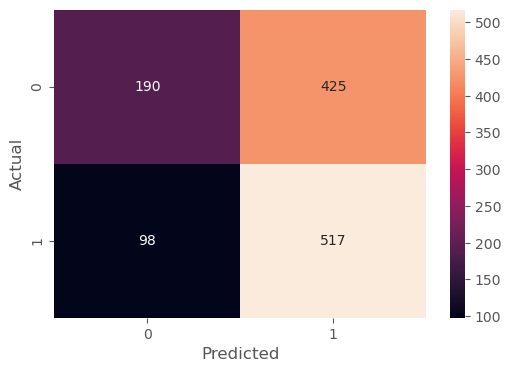

              precision    recall  f1-score   support

           0       0.66      0.31      0.42       615
           1       0.55      0.84      0.66       615

    accuracy                           0.57      1230
   macro avg       0.60      0.57      0.54      1230
weighted avg       0.60      0.57      0.54      1230



In [87]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

In [88]:
#Entrenamiento modelo SVM Sigmoide
modelo_svmS.fit(X_train, y_train)
y_pred = modelo_svmS.predict(X_test)

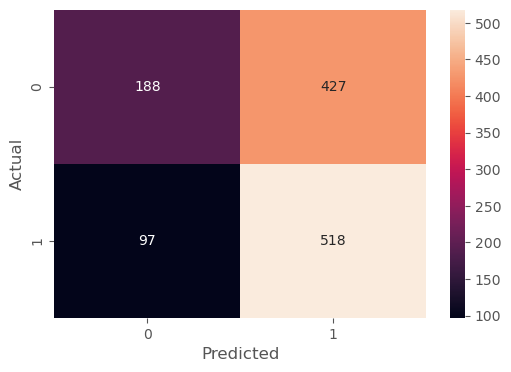

              precision    recall  f1-score   support

           0       0.66      0.31      0.42       615
           1       0.55      0.84      0.66       615

    accuracy                           0.57      1230
   macro avg       0.60      0.57      0.54      1230
weighted avg       0.60      0.57      0.54      1230



In [89]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

AUC: 0.57


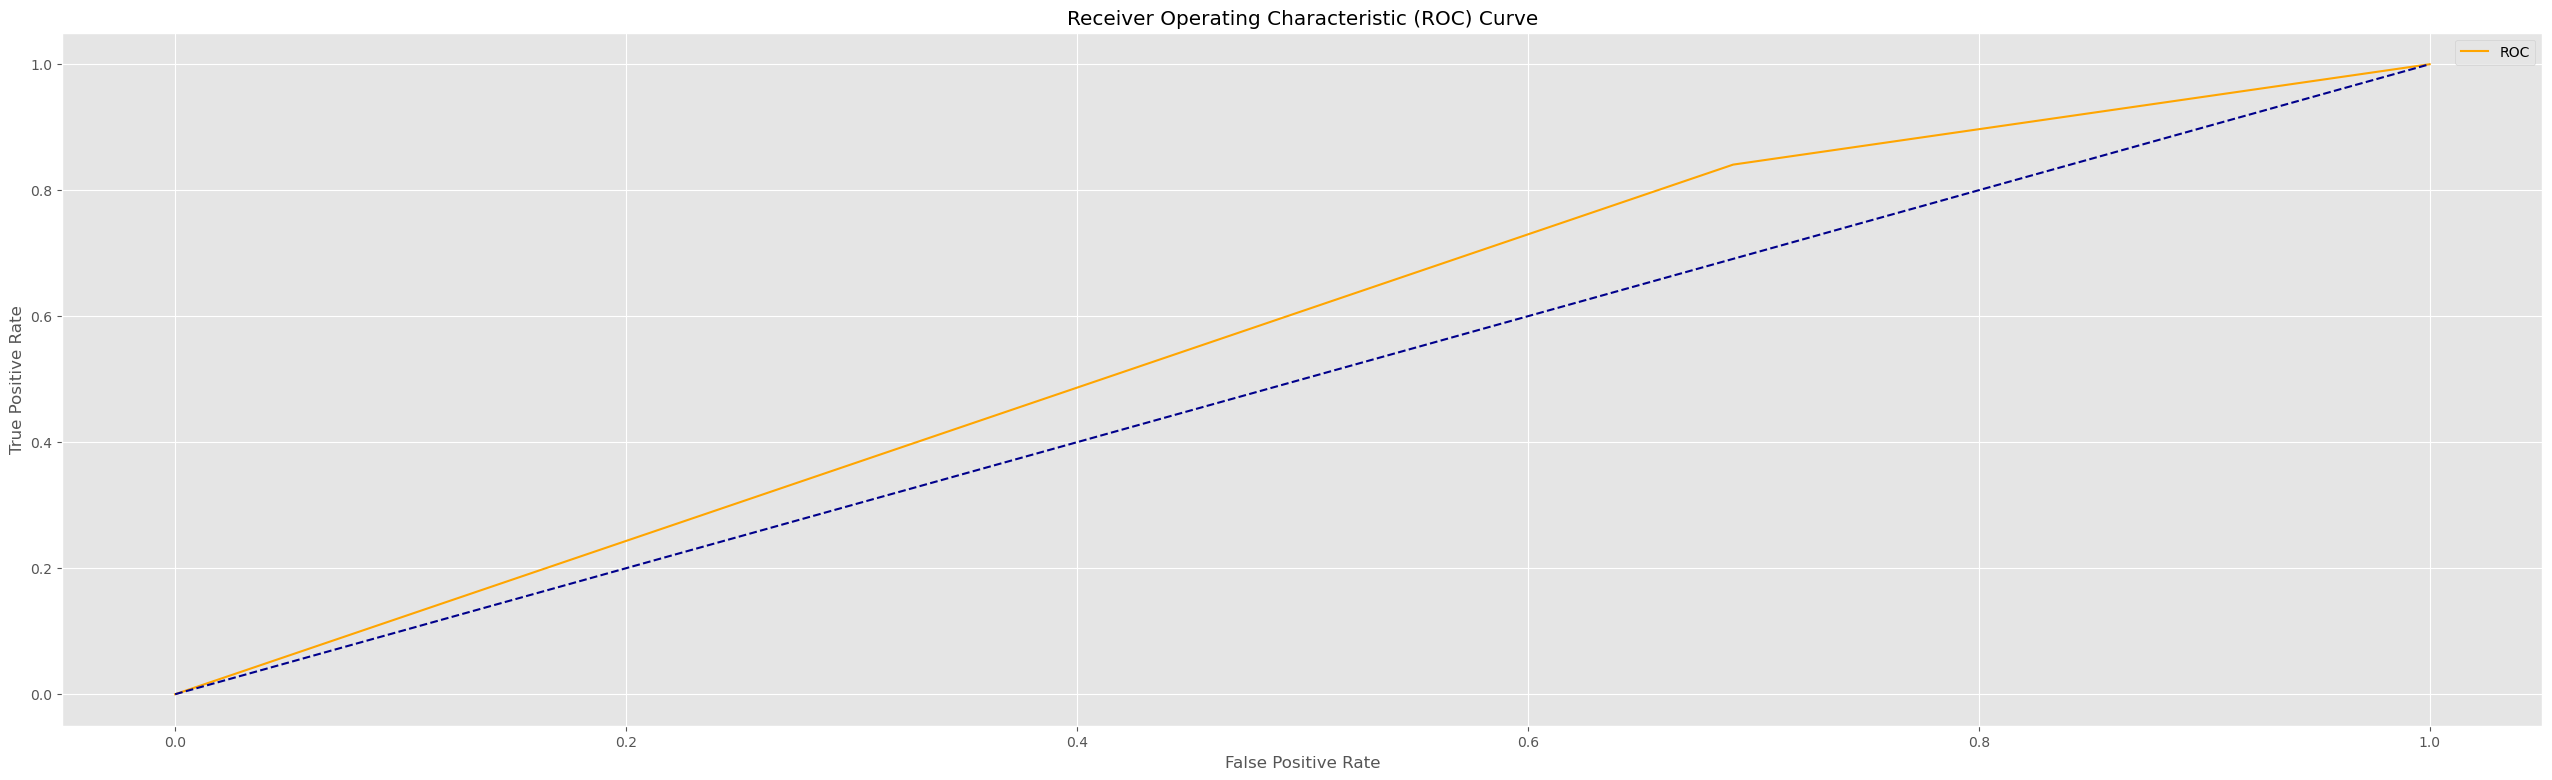

In [90]:
# Predecir las etiquetas de clase usando el modelo de regresión logística entrenado
predicted_labels = modelo_svmR.predict(X_test)

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test, predicted_labels)

# Imprimir el valor del AUC
print('AUC: %.2f' % auc)

# Calcular la curva ROC usando los valores verdaderos y las etiquetas predichas
fpr, tpr, thresholds = roc_curve(y_test, predicted_labels)

# Graficar la curva ROC
plot_roc_curve(fpr, tpr)

## 13. Random Forest

### 13.1 Grid Search basado en out-of-bag score

In [91]:
# Grid de hiperparámetros evaluados

# oob_score = bootstrap
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

In [92]:
resultados.head()

,oob_accuracy,criterion,max_depth,max_features,n_estimators
1,0.6206,gini,NaN,7,150
14,0.6170,entropy,NaN,9,150
6,0.6149,gini,10.0000,5,150
7,0.6149,gini,10.0000,7,150
8,0.6147,gini,10.0000,9,150


### 13.2 Grid Search basado en validación cruzada

In [93]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
18,entropy,10,5,150,0.6212,0.0140,0.7455,0.0037
19,entropy,10,7,150,0.6212,0.0133,0.7505,0.0069
7,gini,10,7,150,0.6198,0.0097,0.7656,0.0053
6,gini,10,5,150,0.6168,0.0091,0.7564,0.0044


In [94]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} : 0.621236012207528 accuracy


In [95]:
modelo_final = grid.best_estimator_

In [96]:
modelo_final

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=5,
                       n_estimators=150, random_state=123)

In [97]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final.predict(X_test)

#### Evaluación del modelo

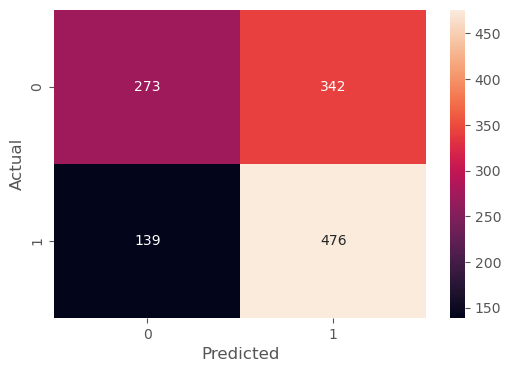

              precision    recall  f1-score   support

           0       0.66      0.44      0.53       615
           1       0.58      0.77      0.66       615

    accuracy                           0.61      1230
   macro avg       0.62      0.61      0.60      1230
weighted avg       0.62      0.61      0.60      1230



In [98]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

AUC: 0.61


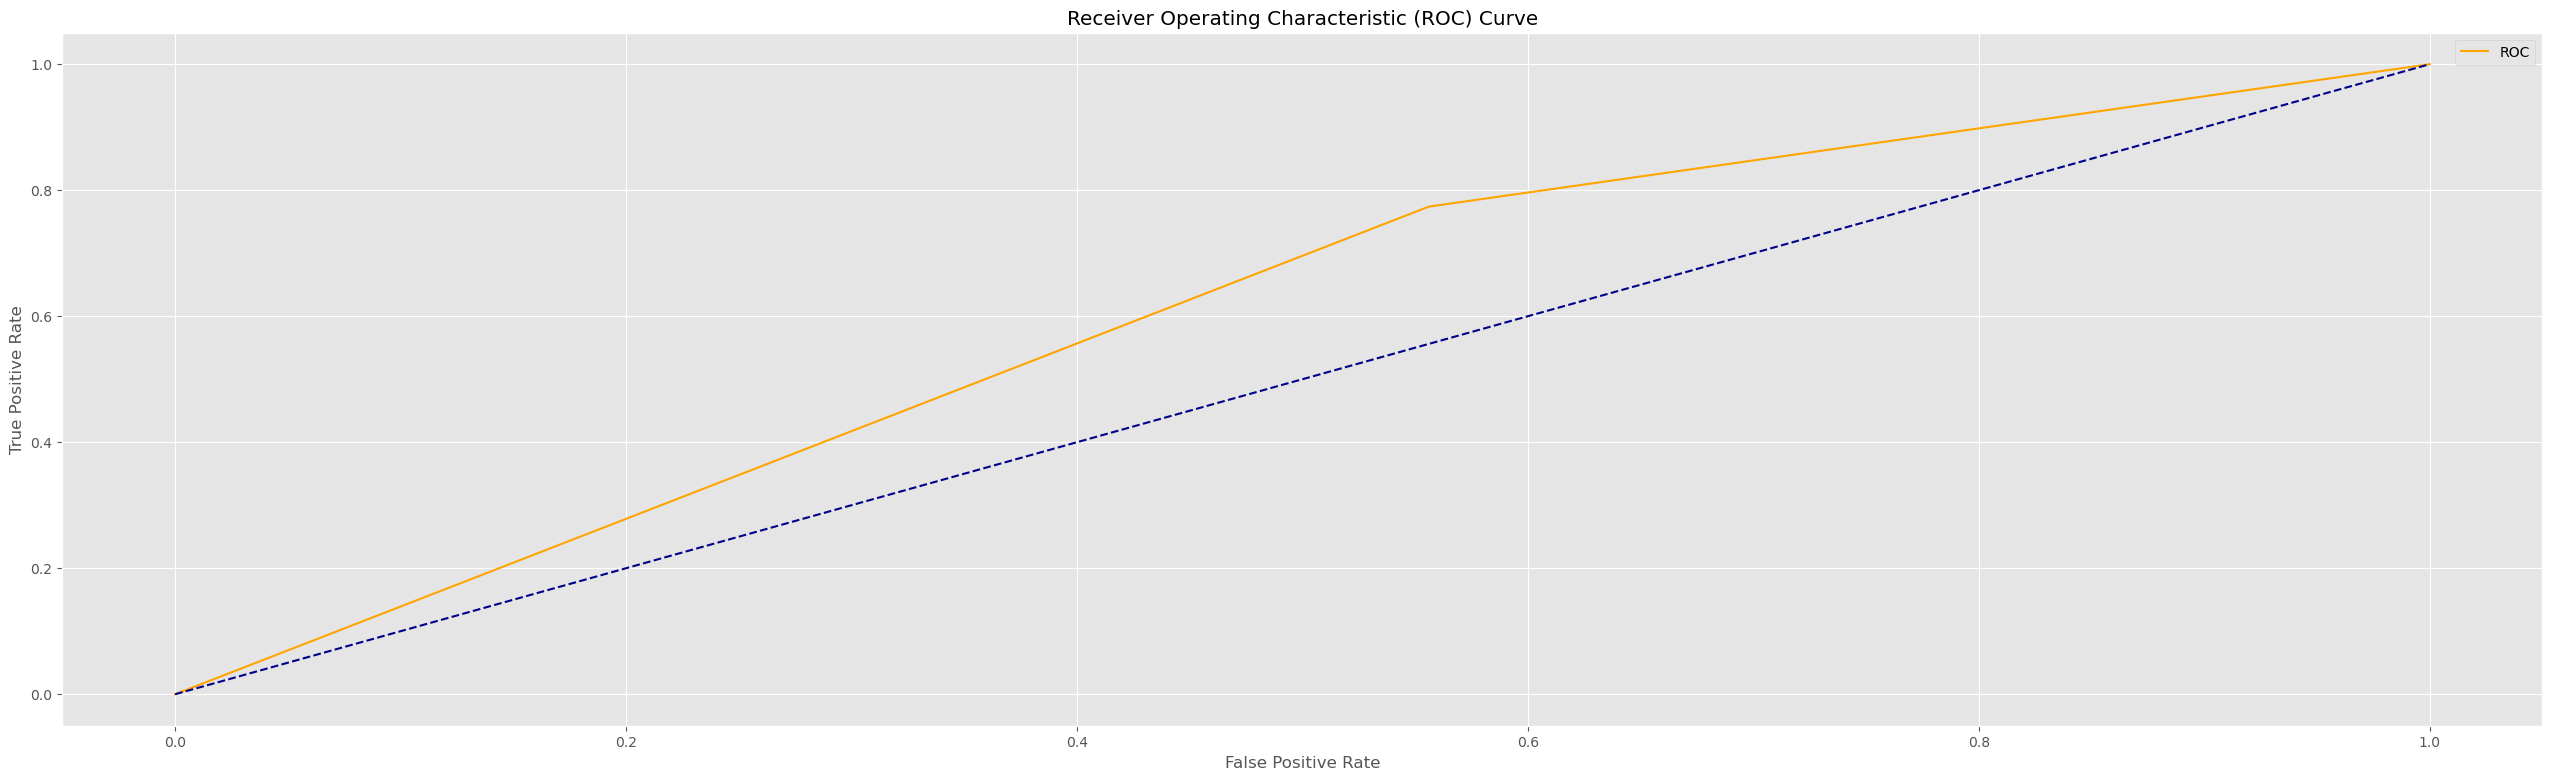

In [99]:
# Predecir las etiquetas de clase usando el modelo de regresión logística entrenado
predicted_labels = modelo_final.predict(X_test)

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test, predicted_labels)

# Imprimir el valor del AUC
print('AUC: %.2f' % auc)

# Calcular la curva ROC usando los valores verdaderos y las etiquetas predichas
fpr, tpr, thresholds = roc_curve(y_test, predicted_labels)

# Graficar la curva ROC
plot_roc_curve(fpr, tpr)